In [1]:
import pandas as pd, numpy as np

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns 

In [5]:
test = pd.read_csv('test_set.csv')
train = pd.read_csv('train_set.csv')

In [7]:
test.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
#missing_values = data.isnull().sum().sort_values(ascending = False)
#missing_values = missing_values[missing_values > 0]/data.shape[0]
#print(f' {missing_values * 100} %' )

 Product_Category_3    69.590195
Product_Category_2    30.969311
dtype: float64 %


In [10]:
train.isnull().sum(axis = 0)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
train = train.fillna(0)

In [17]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [18]:
#focussing on object data types because they cannot go directly into machine learning algo
gender = np.unique(train['Gender'])
gender

array(['F', 'M'], dtype=object)

In [19]:
#since two are present, we will encode it with f=0 and m=1
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
train['Gender'] = train['Gender'].apply(map_gender)

In [22]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,1,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,26-35,20,A,1,1,8,0.0,0.0,7871


In [23]:
age = np.unique(data['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [25]:
def map_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    else:
        return 7
train['Age'] = train['Age'].apply(map_age)

In [26]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,7,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,1,3,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,5,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,5,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,3,20,A,1,1,8,0.0,0.0,7871


In [27]:
city_category = np.unique(data['City_Category'])
city_category

array(['A', 'B', 'C'], dtype=object)

In [28]:
def map_city_category(city_category):
    if city_category == 'A':
        return 1
    elif city_category == 'B':
        return 2
    else:
        return 3
train['City_Category'] = train['City_Category'].apply(map_city_category)

In [29]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,7,16,3,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,1,3,15,1,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,5,7,2,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,5,7,2,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,3,20,1,1,1,8,0.0,0.0,7871


In [30]:
city_stay = np.unique(data['Stay_In_Current_City_Years'])
city_stay

array(['0', '1', '2', '3', '4+'], dtype=object)

In [34]:
def apply_city_stay(stay):
    if stay == '4+':
        return 4
    else:
        return int(stay)
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(apply_city_stay)

In [35]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,1,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,7,16,3,4,0,8,0.0,0.0,7969
5,1000003,P00193542,1,3,15,1,3,0,1,2.0,0.0,15227
6,1000004,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,5,7,2,2,1,1,15.0,0.0,15854
8,1000004,P0097242,1,5,7,2,2,1,1,16.0,0.0,15686
9,1000005,P00274942,1,3,20,1,1,1,8,0.0,0.0,7871


In [37]:
cols = ['User_ID', 'Product_ID']
train.drop(cols, inplace=True, axis=1)

In [40]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,0.0,0.0,8370
1,0,1,10,1,2,0,1,6.0,14.0,15200
2,0,1,10,1,2,0,12,0.0,0.0,1422
3,0,1,10,1,2,0,12,14.0,0.0,1057
4,1,7,16,3,4,0,8,0.0,0.0,7969


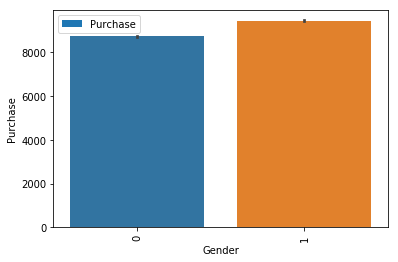

In [45]:
train[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = train)
plt.show()

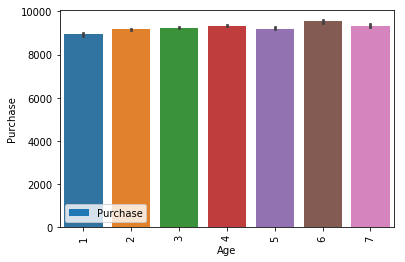

In [49]:
train[['Age', 'Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = train)
plt.show()

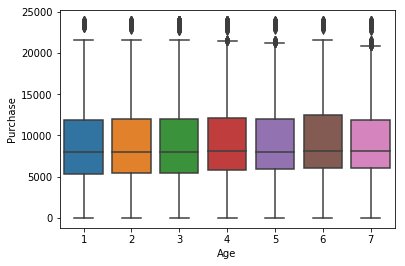

In [52]:
sns.boxplot('Age','Purchase', data = train)
plt.show()


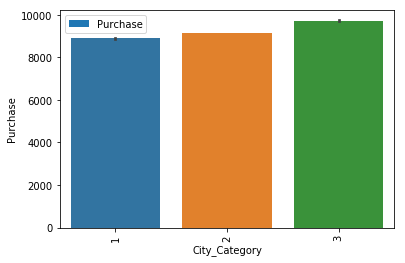

In [53]:
train[['City_Category', 'Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = train)

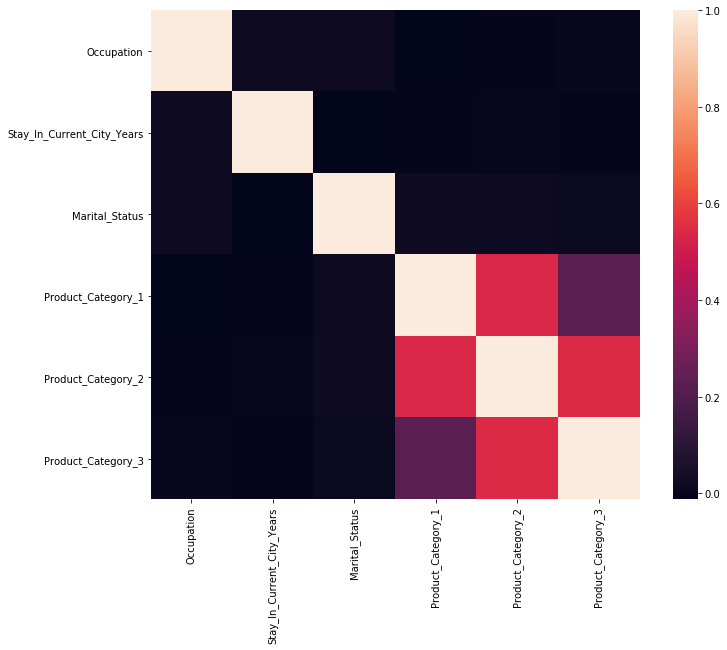

In [60]:
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True)

In [62]:
mean_category_1 = data['Product_Category_1'].mean()
mean_category_2 = data['Product_Category_2'].mean()
mean_category_3= data['Product_Category_3'].mean()
print(f"PC1: {mean_category_1} \n PC2: {mean_category_2} \n PC3 : {mean_category_3}")

PC1: 5.276542279718663 
 PC2: 9.849586059346997 
 PC3 : 12.669453946534905
